In [1]:
import joblib 
import numpy as np 
from matplotlib import pyplot as plt 
from uncertainties import ufloat, unumpy

from pathlib import Path
from tqdm import tqdm
from numpy import array
import sys
sys.path.append("..")
from core.utils import *
import atlas_mpl_style as ampl
import random
import mplhep as hep
hep.style.use("ATLAS")
import random

pkl_path = '/global/cfs/projectdirs/atlas/wys/QG_Calibration/note_plots'
#pkl_path = '/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/note_plots'
pkl_path = Path(pkl_path)
nominal_path = pkl_path / 'nominal' / 'plots' / 'ADE' / 'Extraction_Results'
reweighting_vars = ['none','jet_nTracks', 'GBDT_newScore']
label_var = ['jet_nTracks', 'jet_trackWidth', 'jet_trackC1', 'GBDT_newScore']
nominal_keys = [reweighting_var + '_quark_reweighting_weights' for reweighting_var in reweighting_vars]
WPs = [0.5]#, 0.6, 0.7, 0.8]
partons=['Quark','Gluon']
label_ptrange = [500, 600, 800, 1000, 1200, 1500,2000]
bin_centers = 0.5 * (np.array(label_ptrange[:-1]) + np.array(label_ptrange[1:]))
Map_var_title = {
    "jet_pt": "$p_{T}$",
    "jet_nTracks": "$n_{trk}$",
    "jet_trackBDT": "old BDT",
    "jet_eta": "$\eta$",
    "jet_trackC1": "$C_{1}$",
    "jet_trackWidth": "$w^{trk}$",
    "GBDT_newScore": "BDT score",
    "none":"No"
}
HistBins = {
    'jet_pt' : np.linspace(500, 2000, 61),
    'jet_eta' : np.linspace(-2.5, 2.5, 51), 
    'jet_nTracks' :np.linspace(-0.5, 59.5, 61),
    'jet_trackWidth' : np.linspace(0.01, 0.4, 61),
    'jet_trackC1' : np.linspace(0.01, 0.4, 61),
    'jet_trackBDT' : np.linspace(-1.0, 1.0, 101),
    'GBDT_newScore' : np.linspace(-5.0, 5.0, 101),
}

Map_gen={
"nominal": "PYTHIA",
"hadronization/sherpa": "SHERPA (Cluster Had.)",
"hadronization/sherpalund": "SHERPA (String Had.)",
"matrix_element/powhegpythia":"POWHEG + PYTHIA",
"parton_shower/herwigangle":"HERWIG (Angular Shower)",
"parton_shower/herwigdipole":"HERWIG (Dipole Shower)",
}

In [2]:
def safe_array_divide_unumpy(numerator, denominator):
    if 0 in unumpy.nominal_values(denominator):
        _denominator_nominal_values = unumpy.nominal_values(denominator)
        _denominator_std_devs = unumpy.std_devs(denominator)
        zero_idx = np.where(_denominator_nominal_values==0)[0]
        _denominator_nominal_values[zero_idx] = np.inf
        _denominator_std_devs[zero_idx] = 0 
        _denominator = unumpy.uarray(_denominator_nominal_values, _denominator_std_devs)

        ratio = np.true_divide(numerator, _denominator) 
        # raise Warning(f"0 exists in the denominator for unumpy, check it!")
    else:
        ratio = np.true_divide(numerator, denominator)        
    return ratio
def Normalize_unumpy(array_unumpy, bin_width=1.0):
    area = np.sum(unumpy.nominal_values(array_unumpy)) * bin_width
    return array_unumpy / area

/tmp/ipykernel_1160596/986512210.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.05})


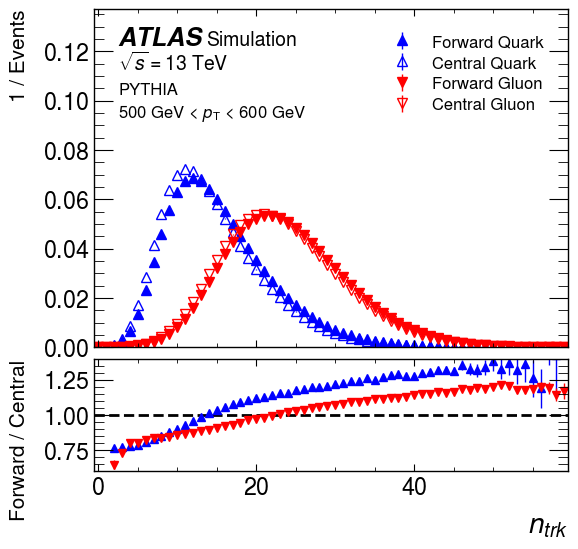

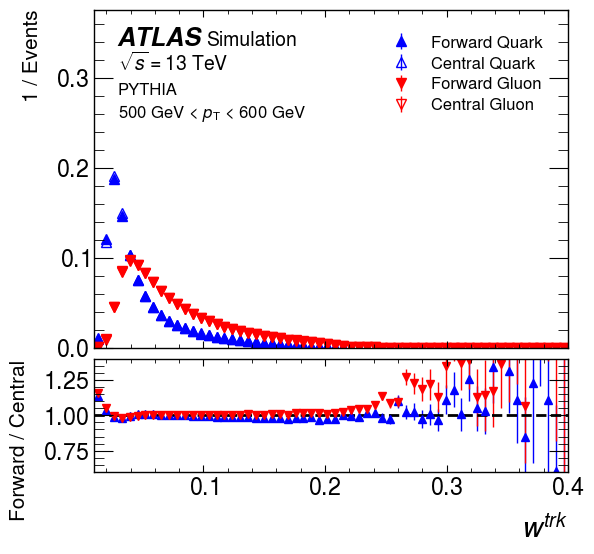

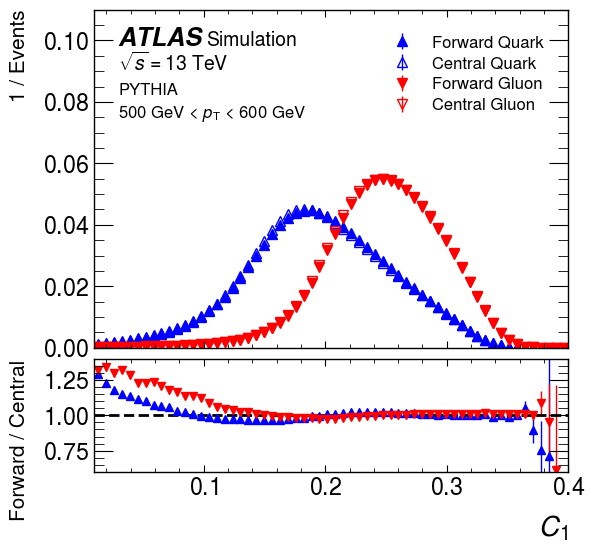

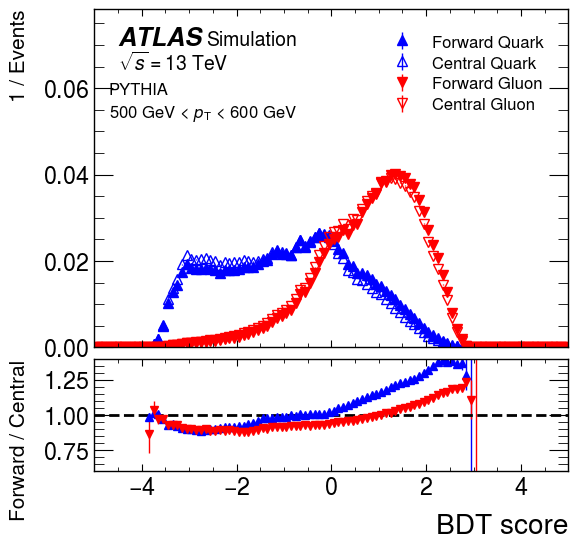

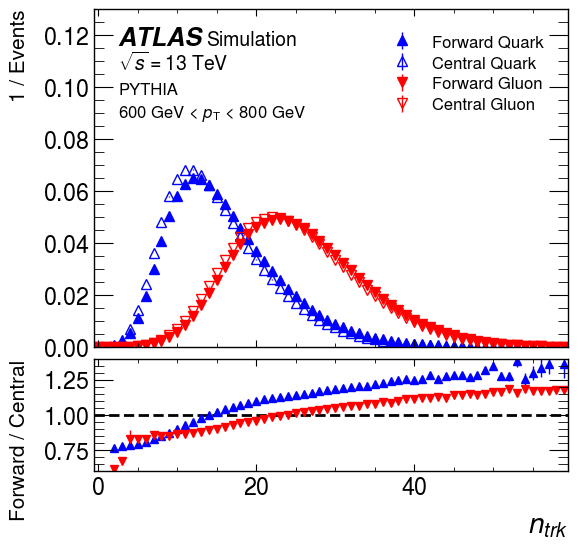

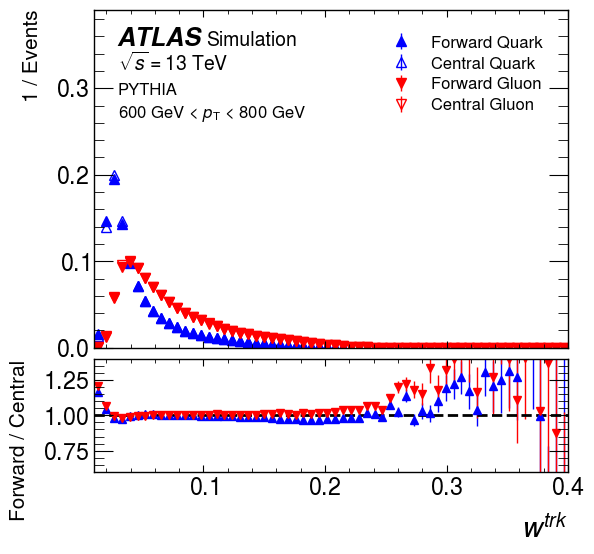

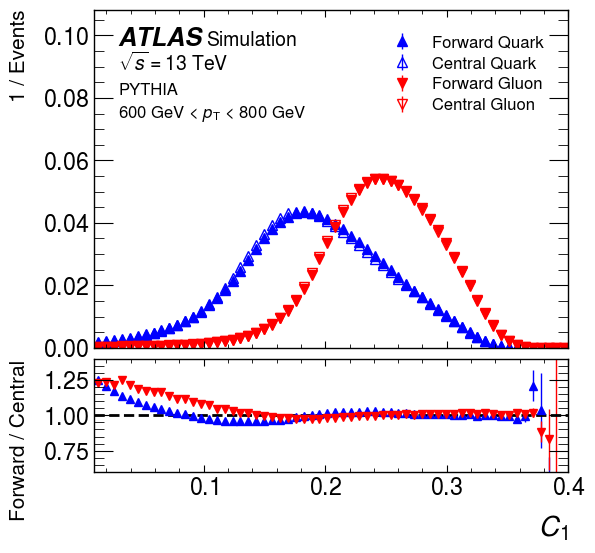

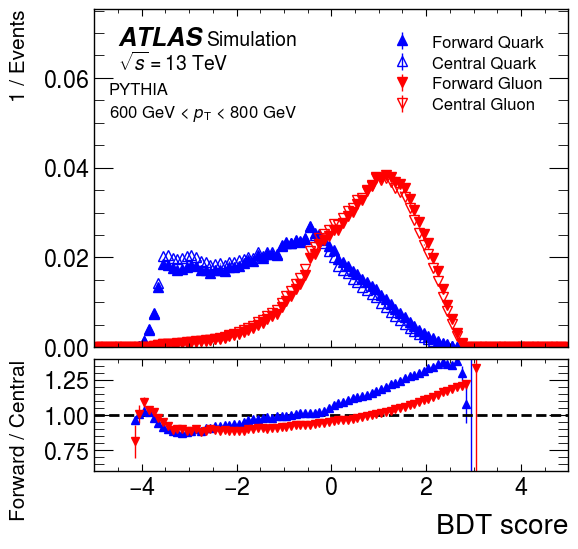

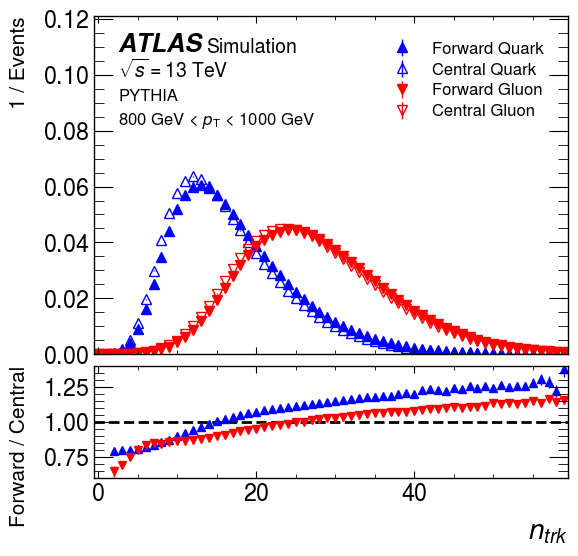

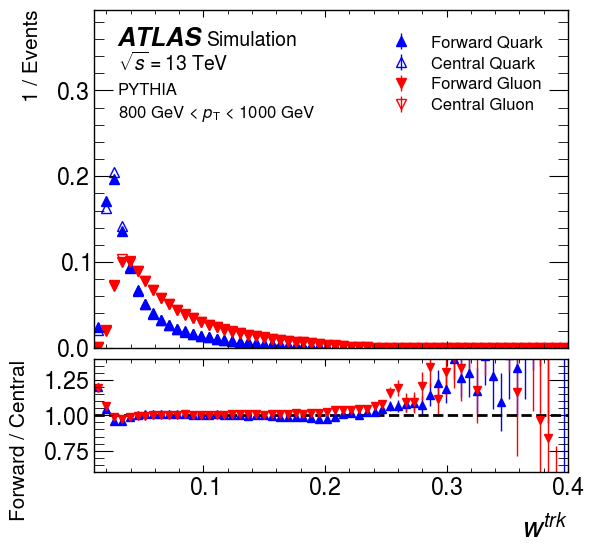

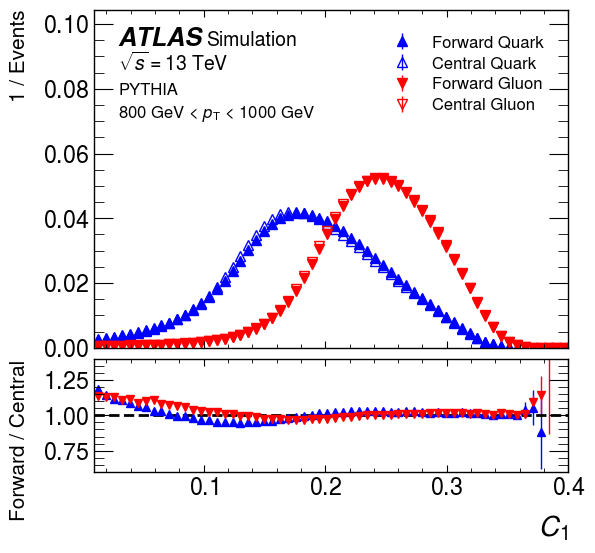

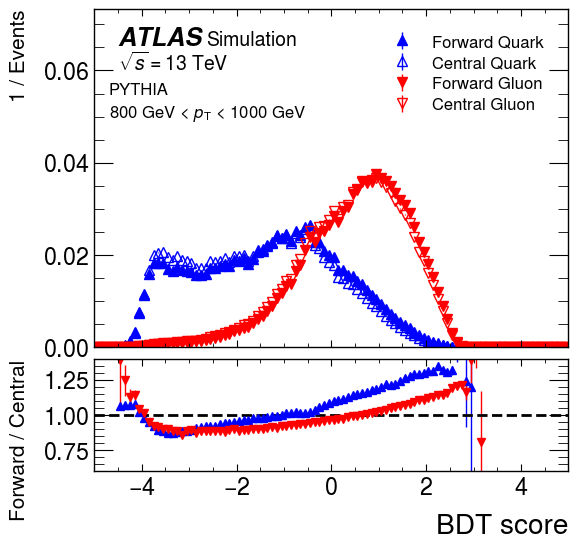

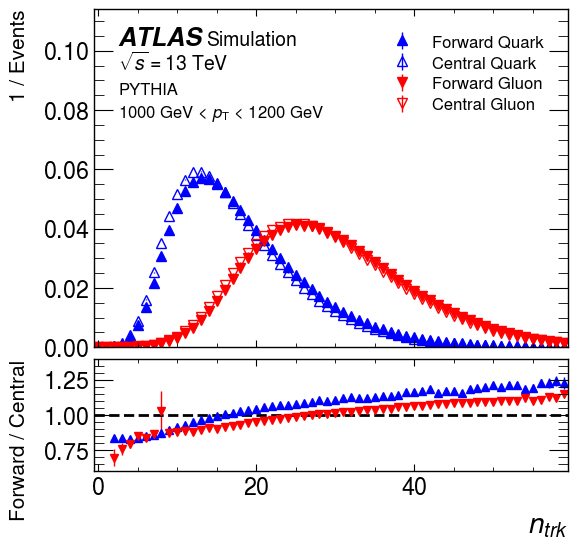

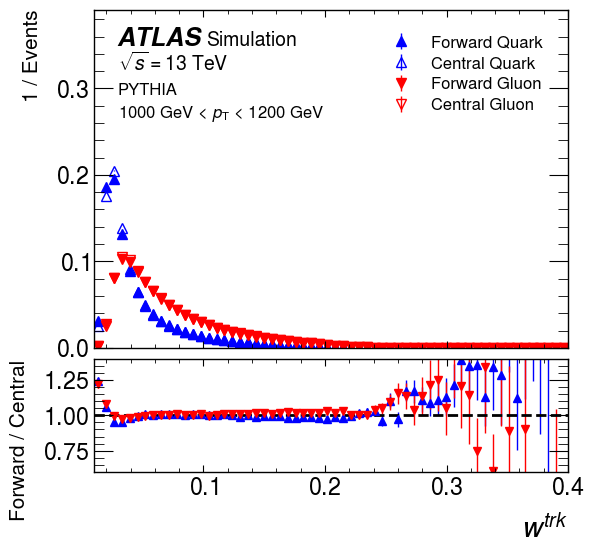

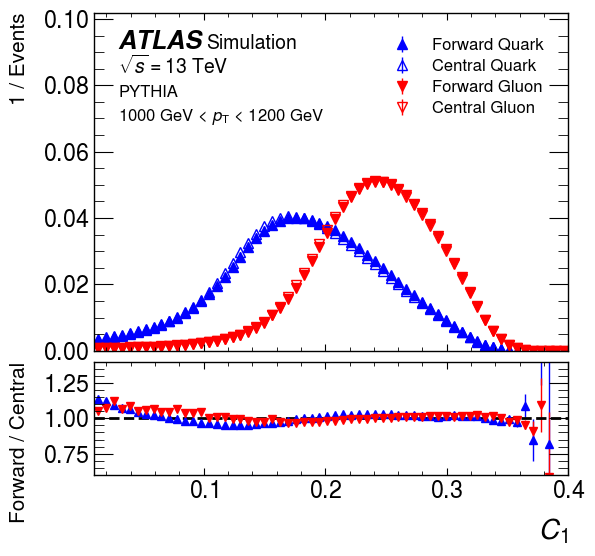

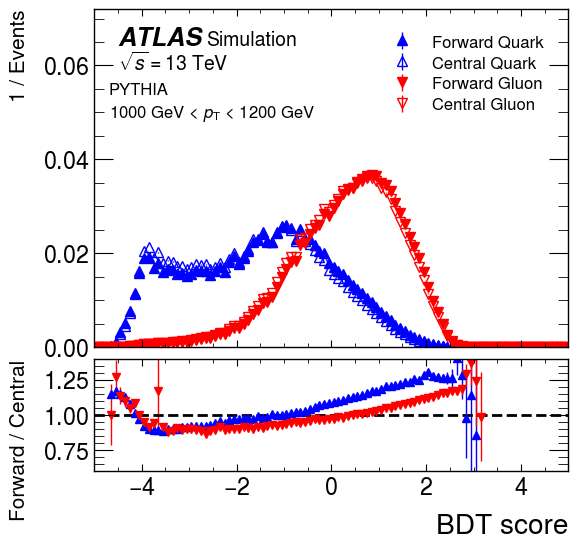

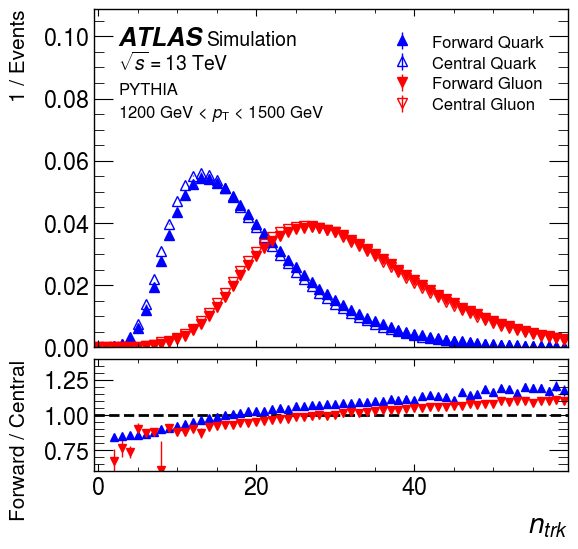

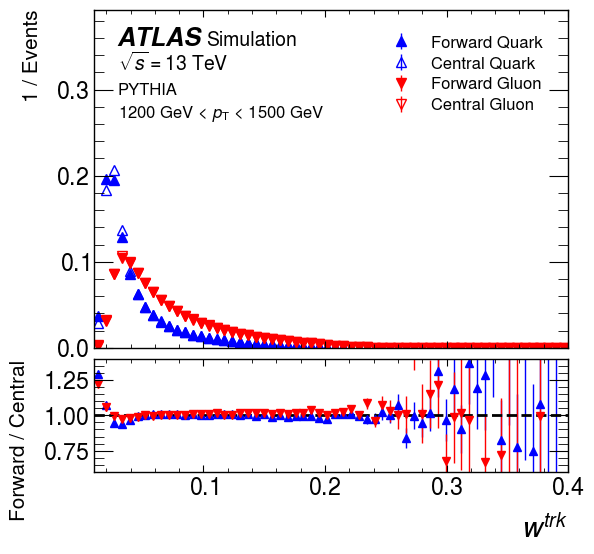

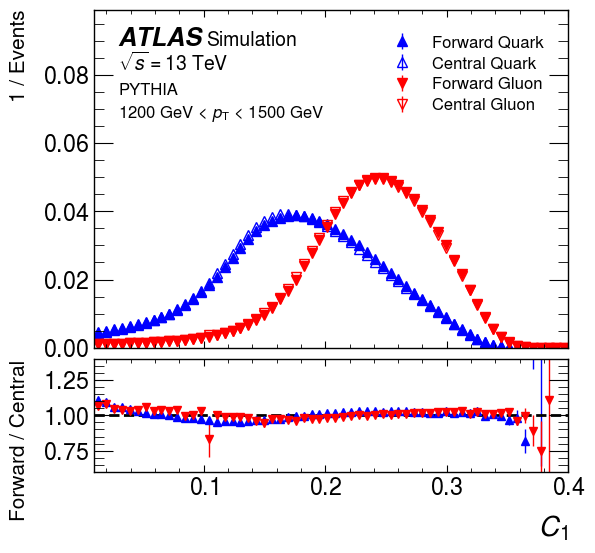

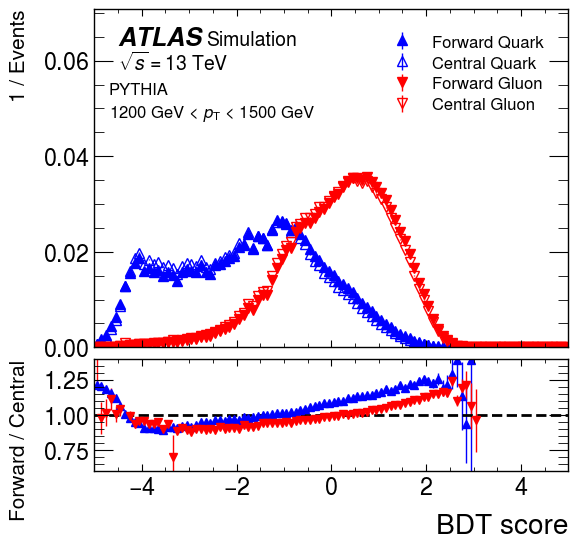

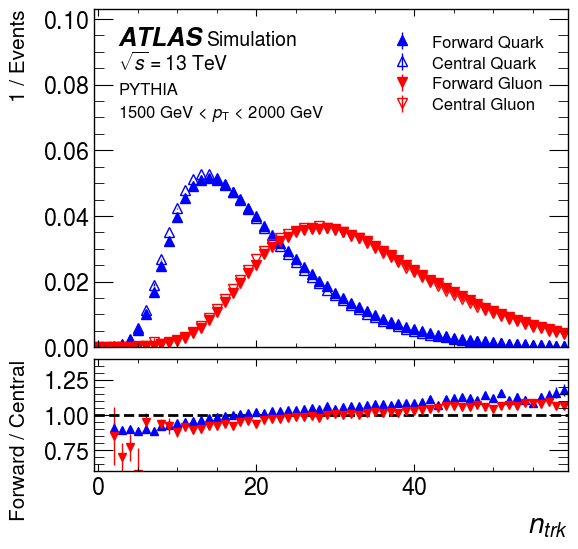

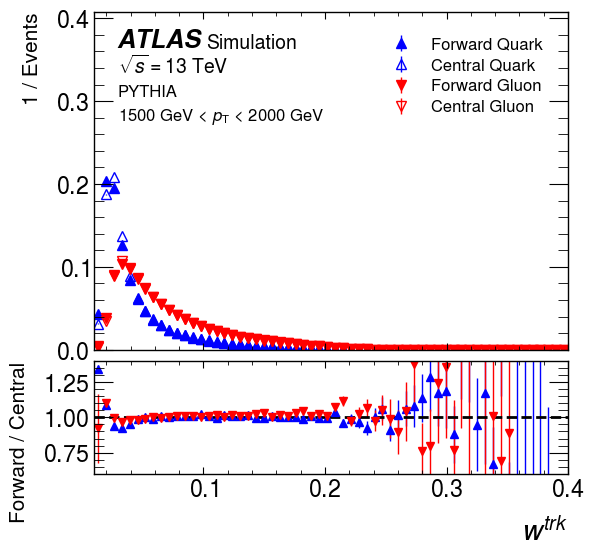

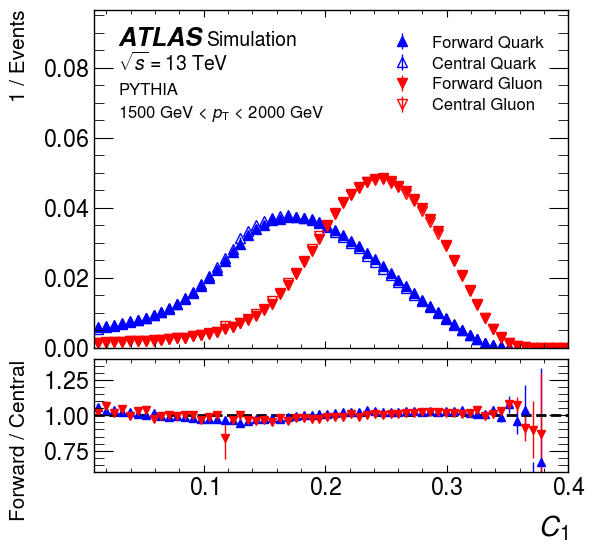

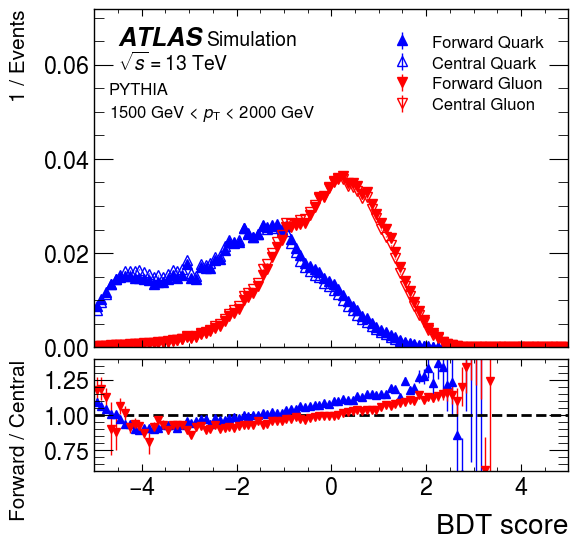

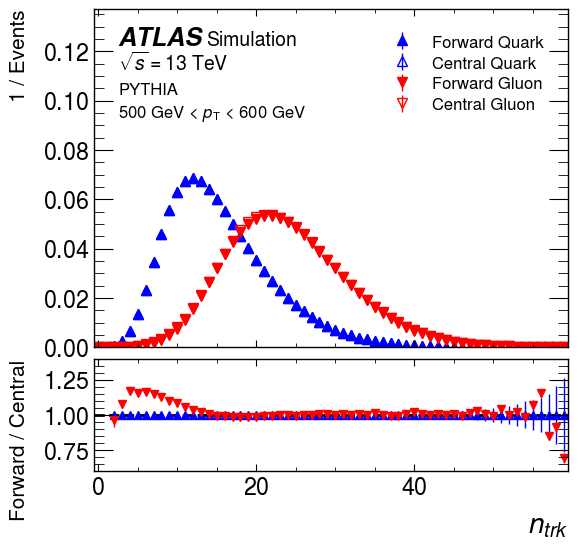

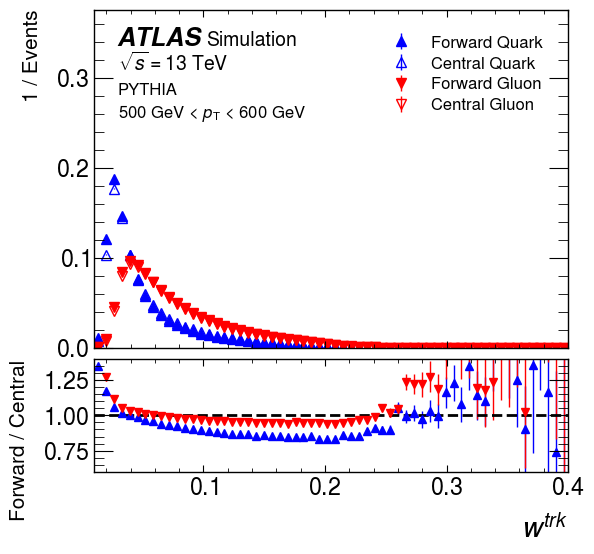

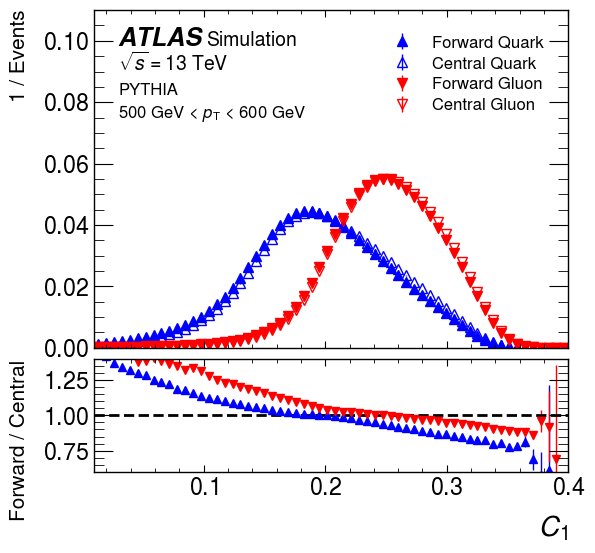

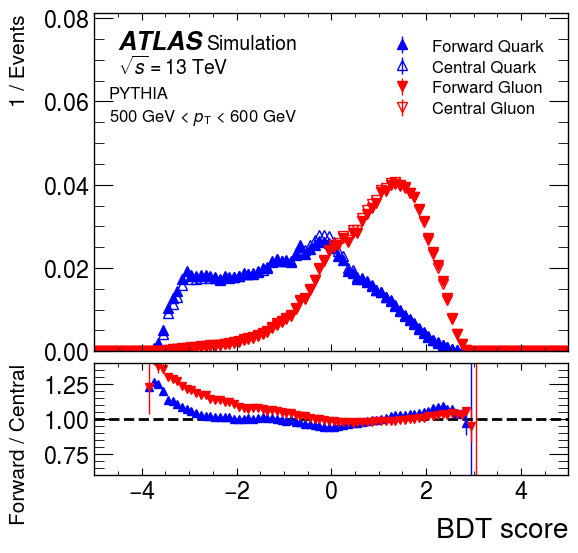

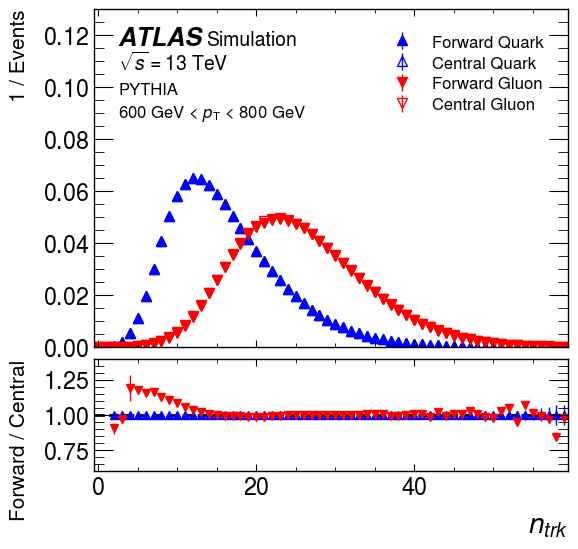

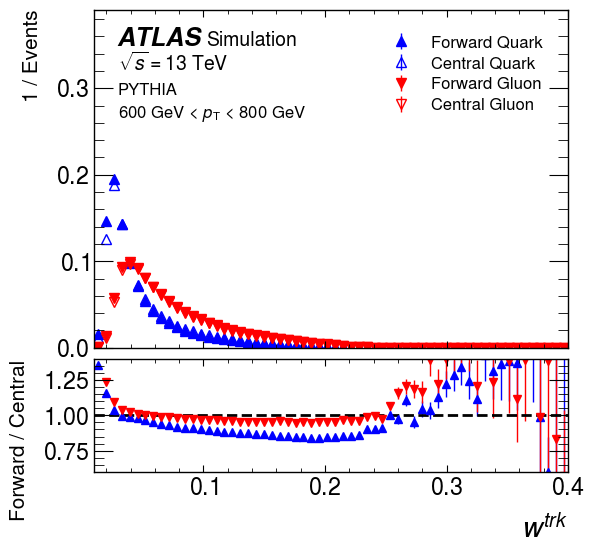

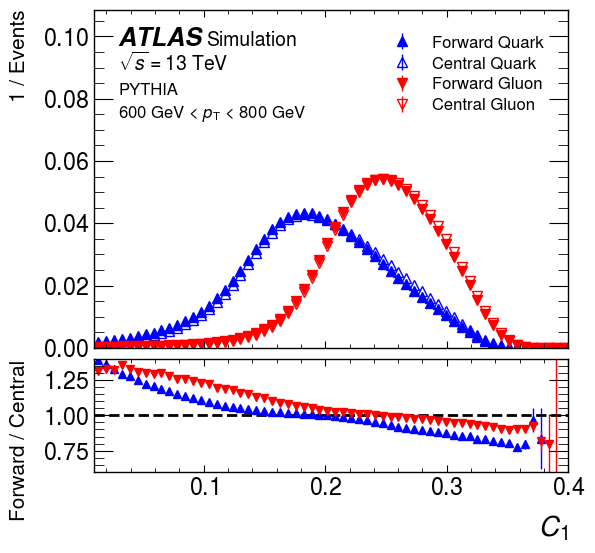

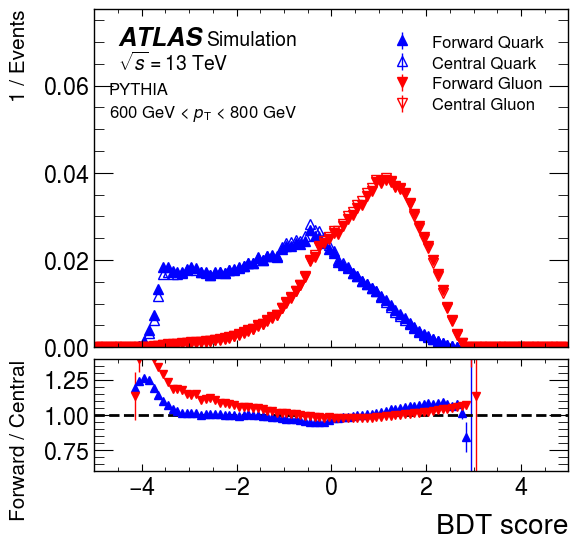

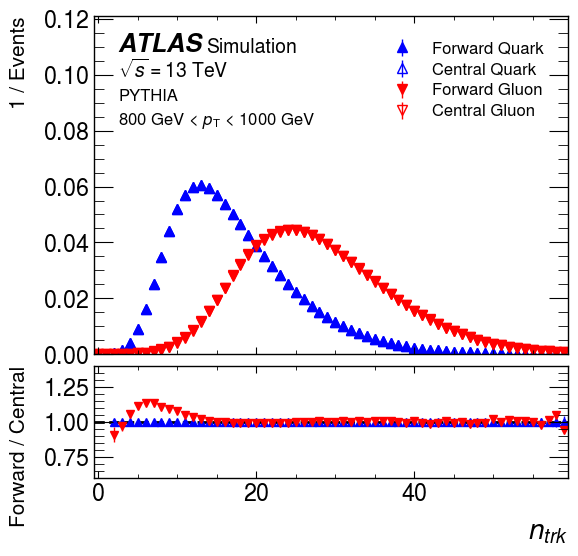

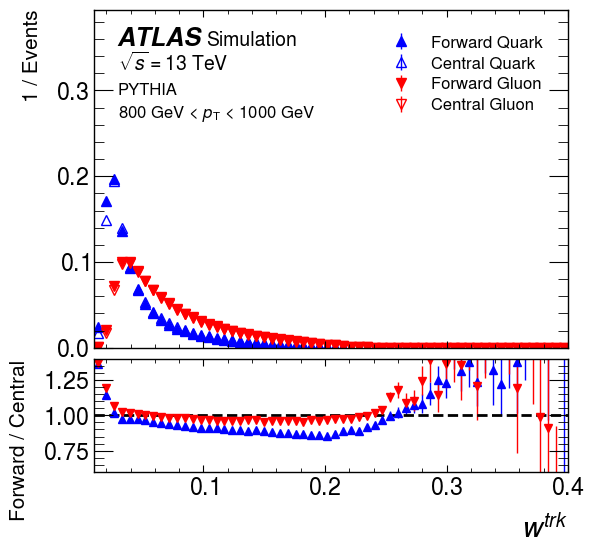

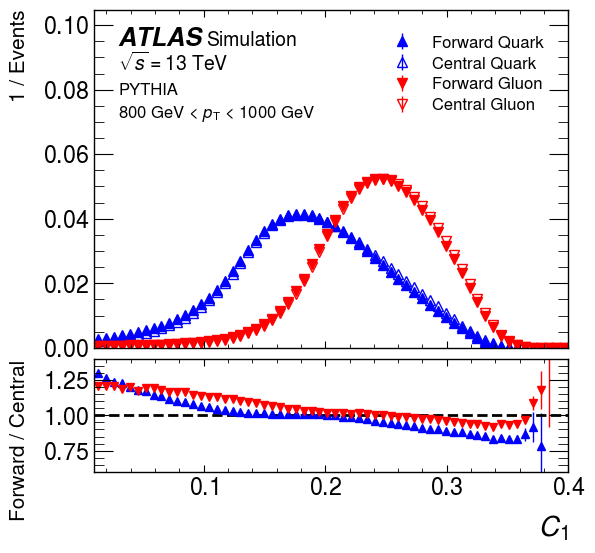

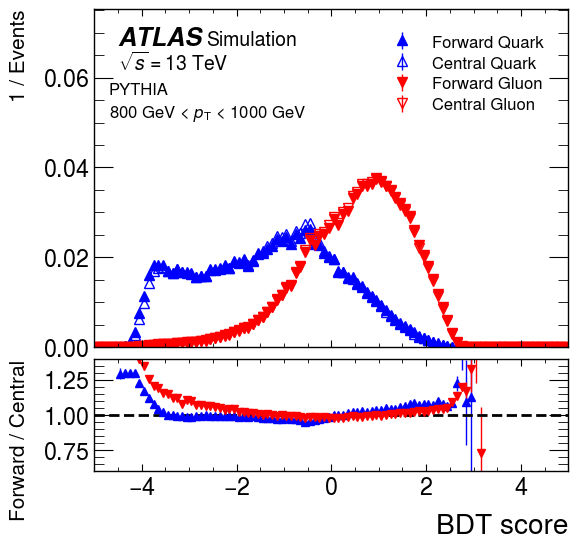

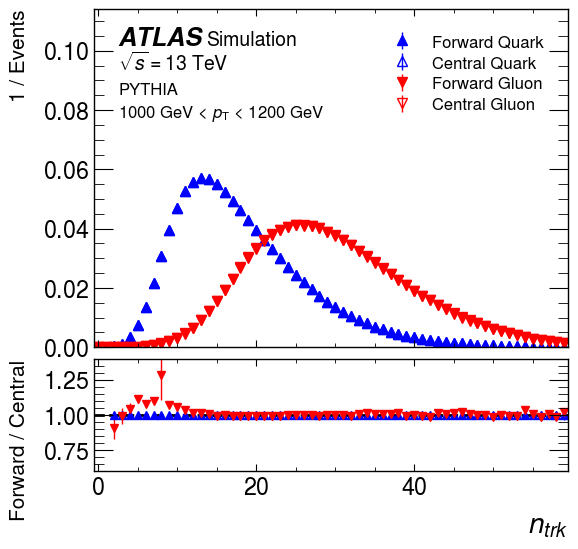

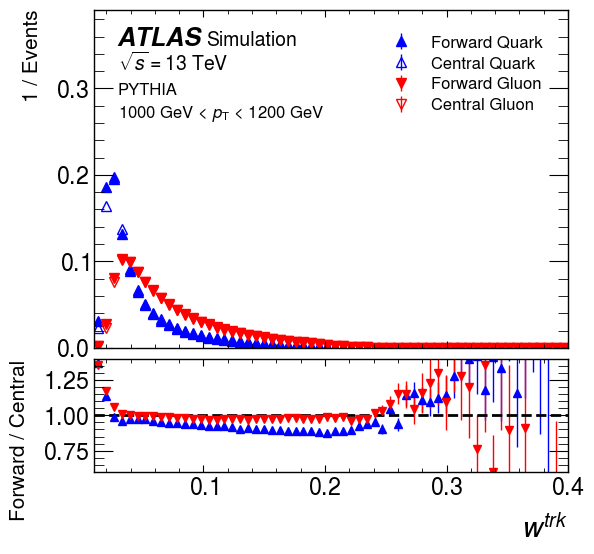

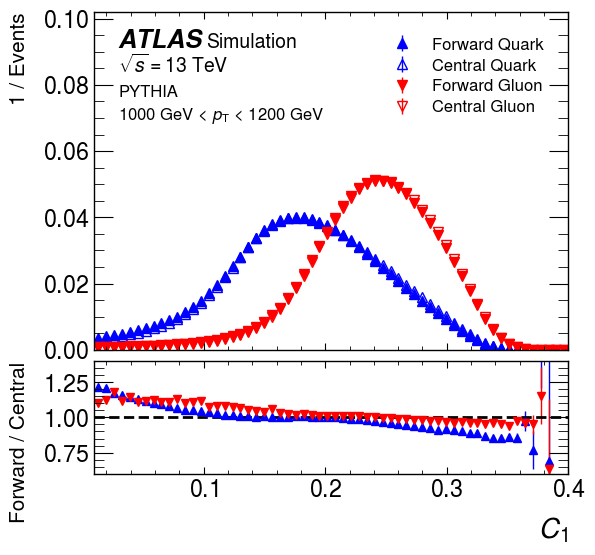

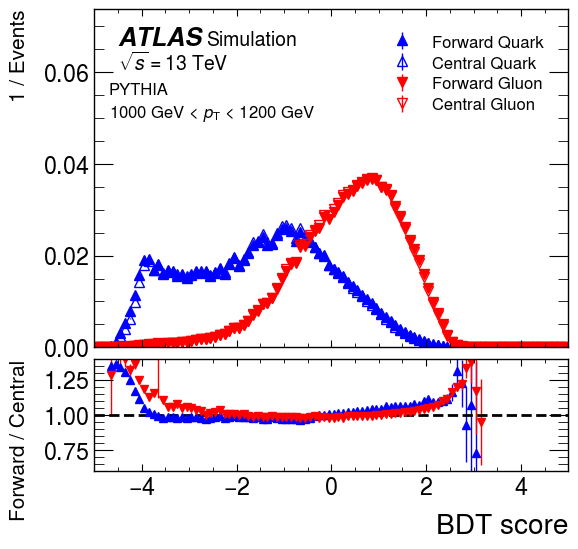

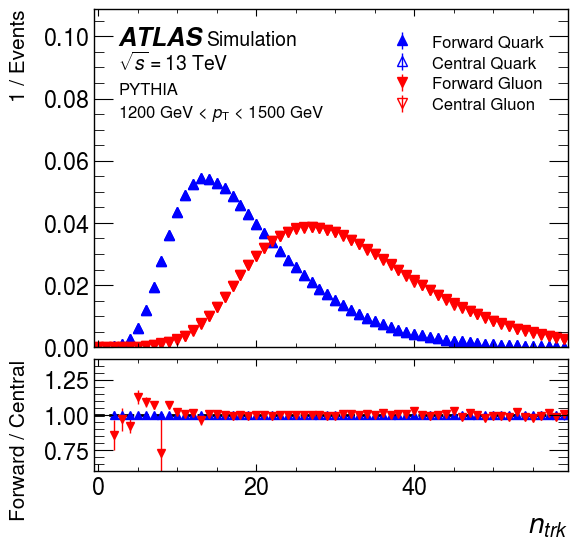

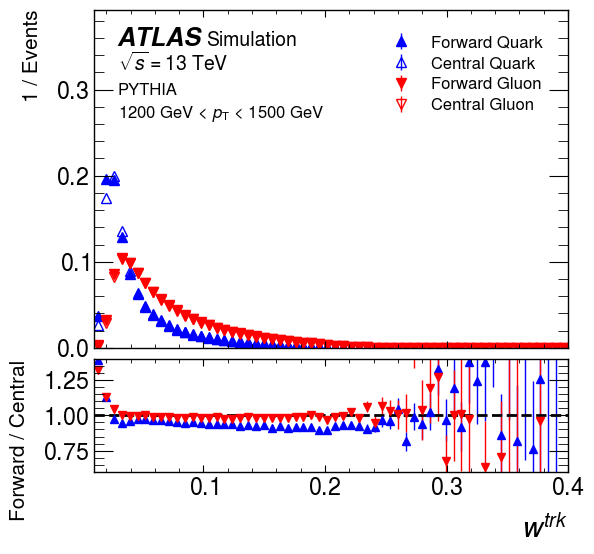

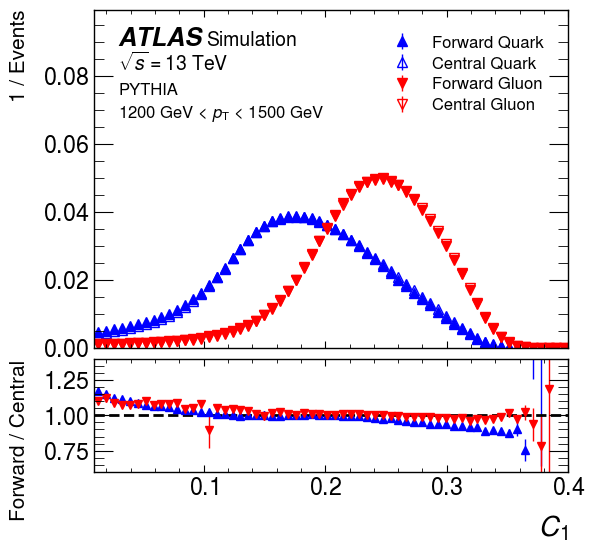

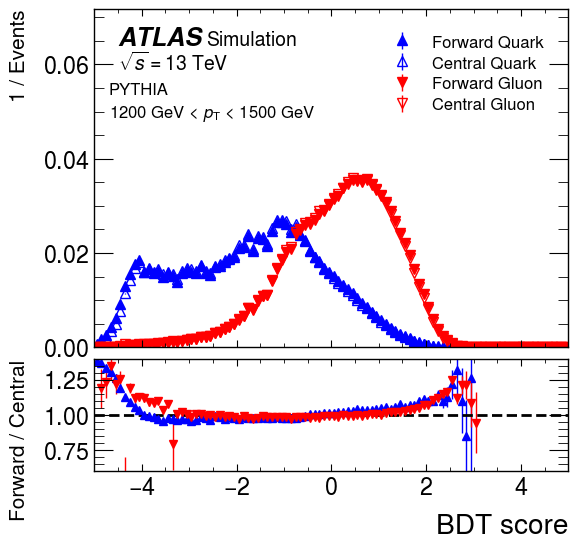

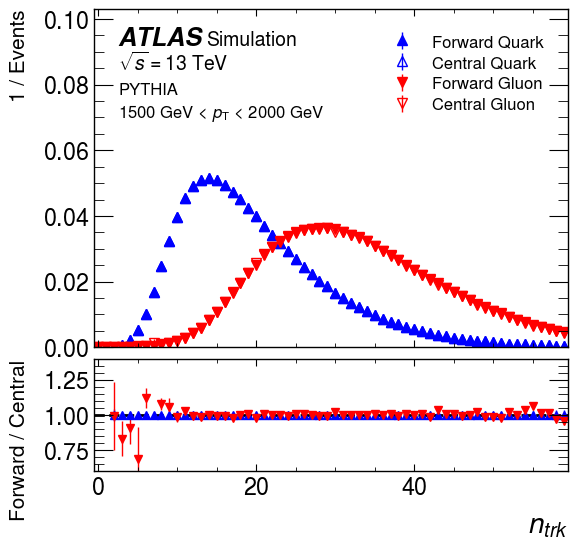

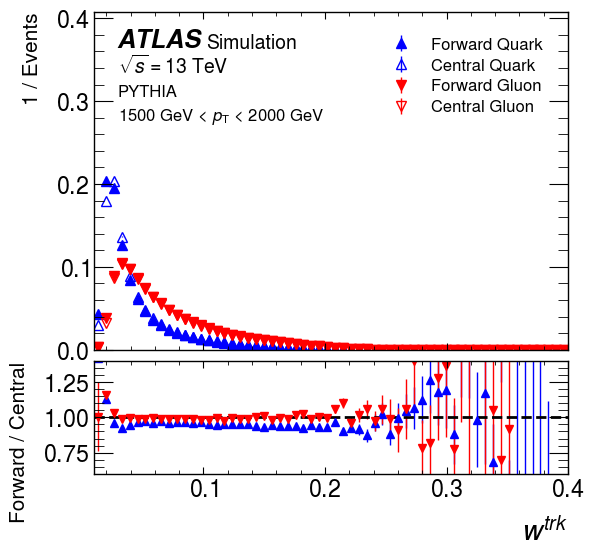

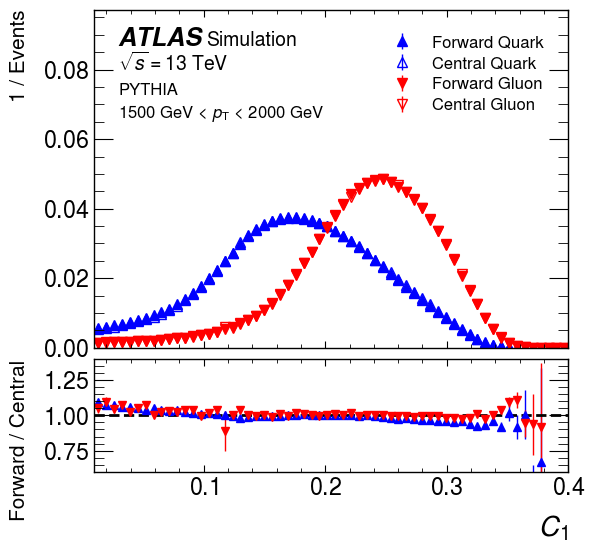

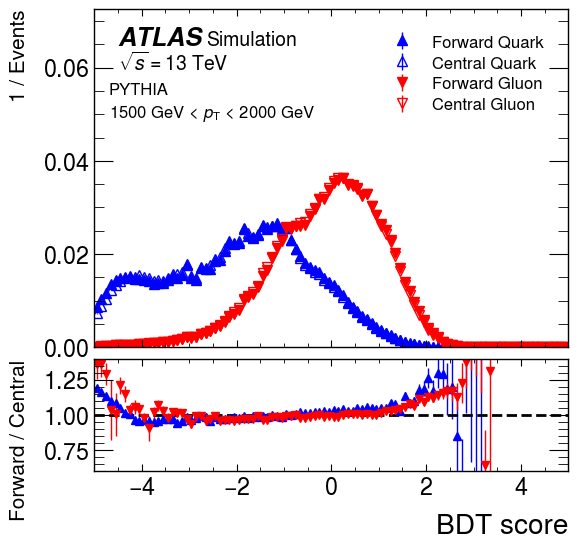

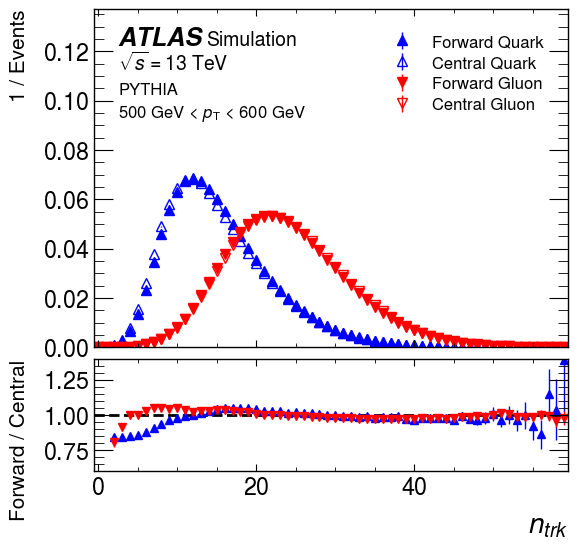

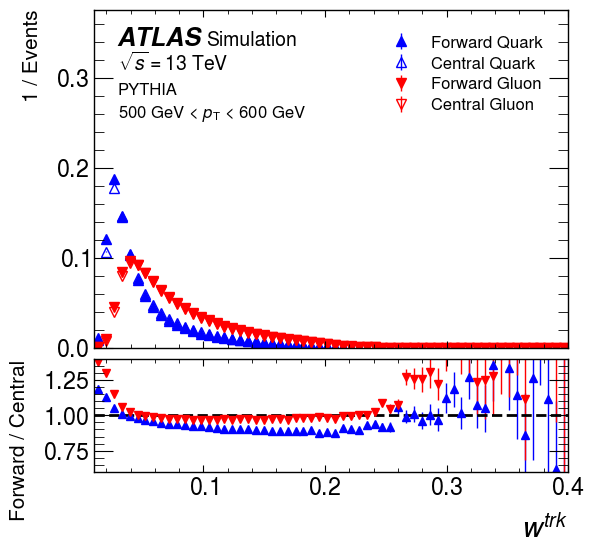

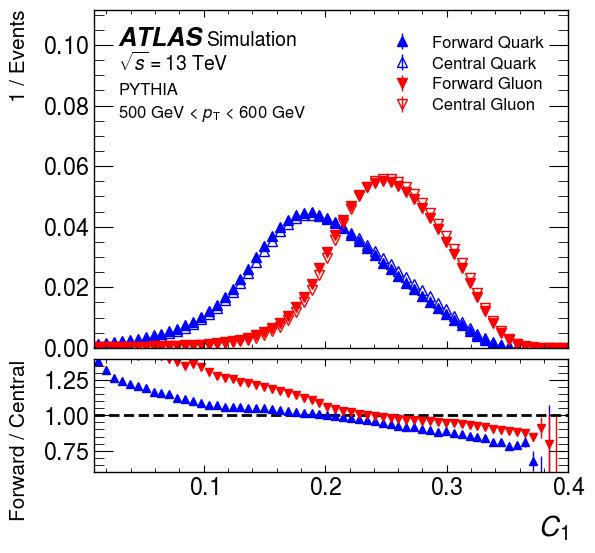

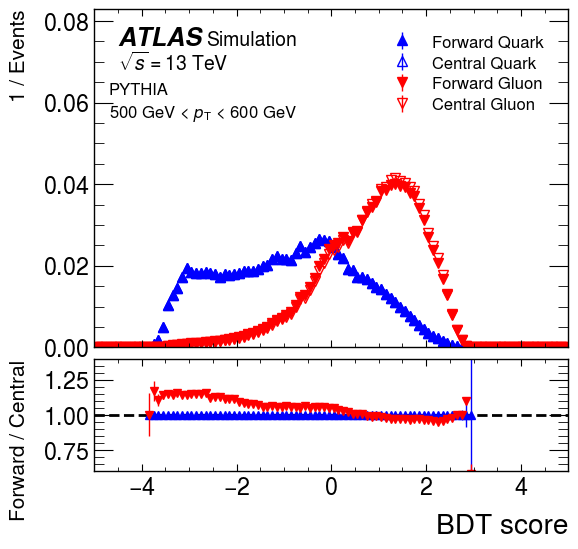

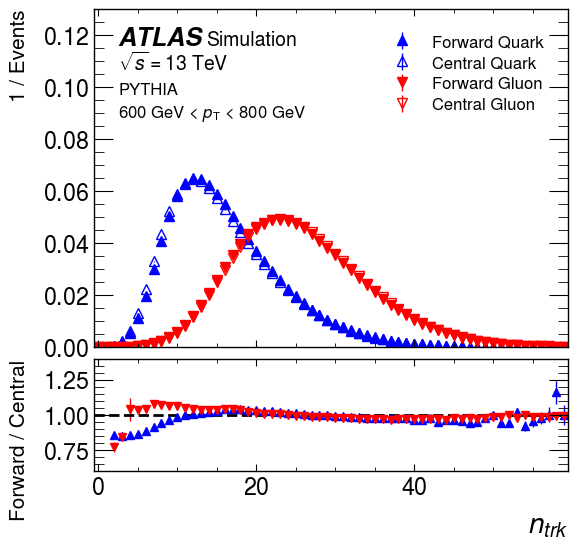

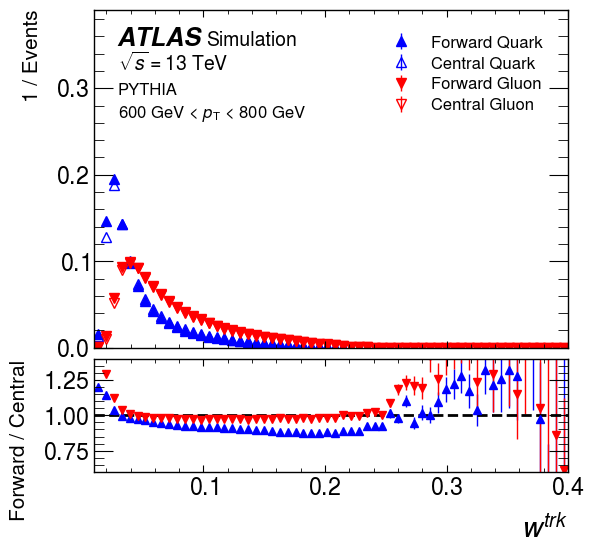

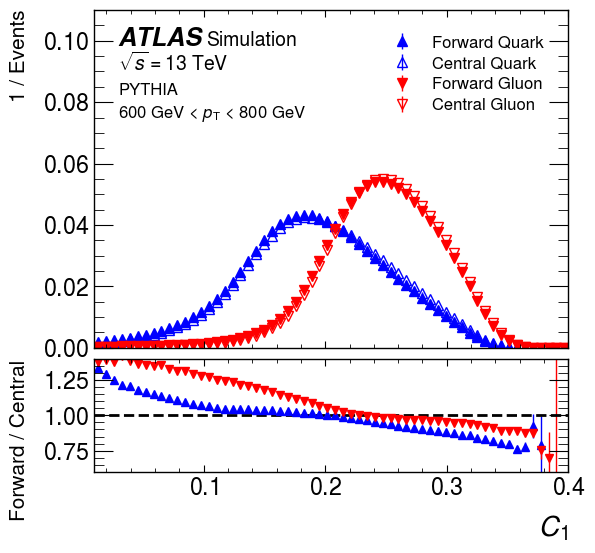

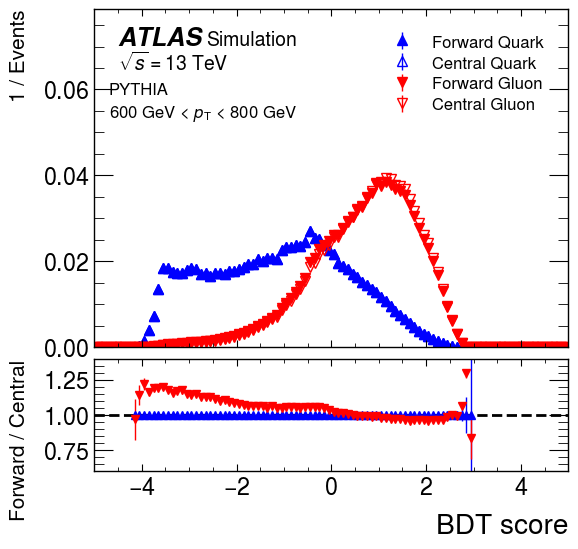

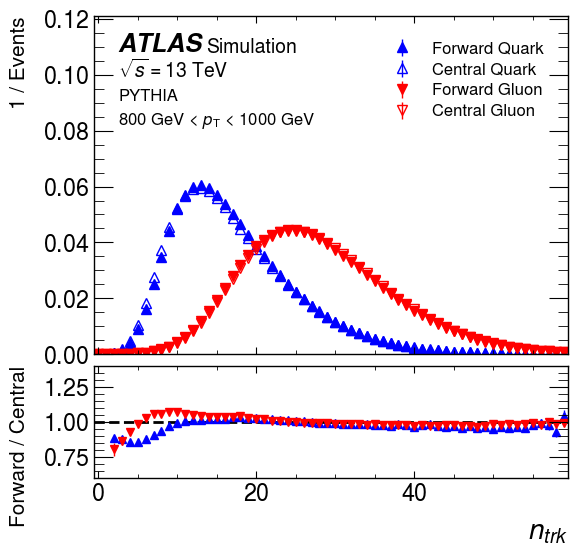

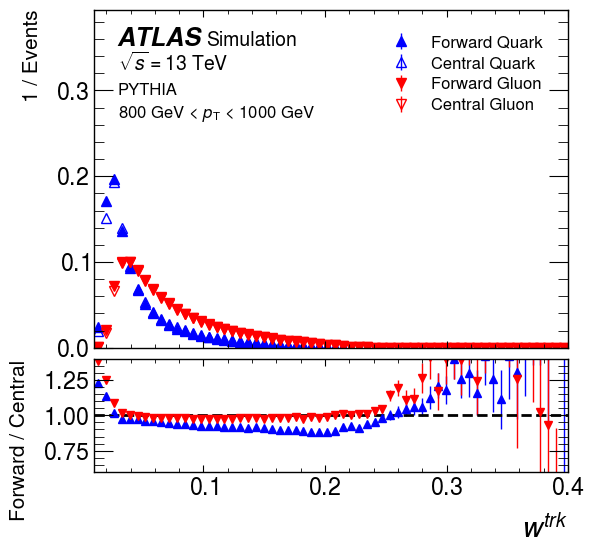

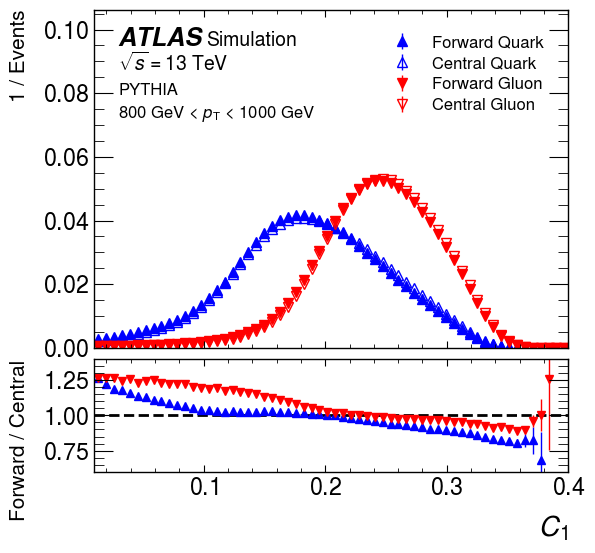

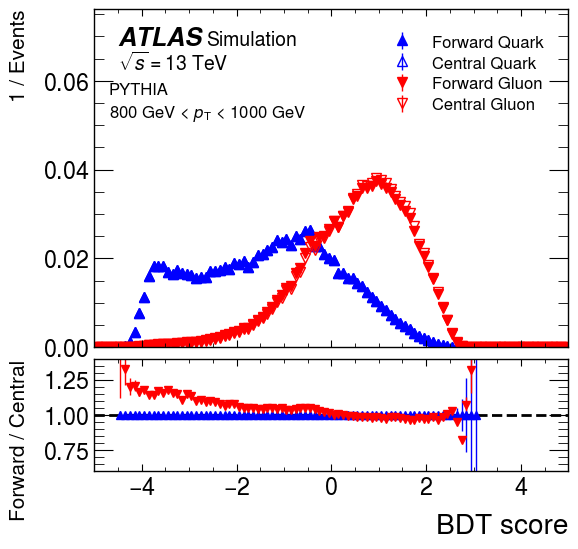

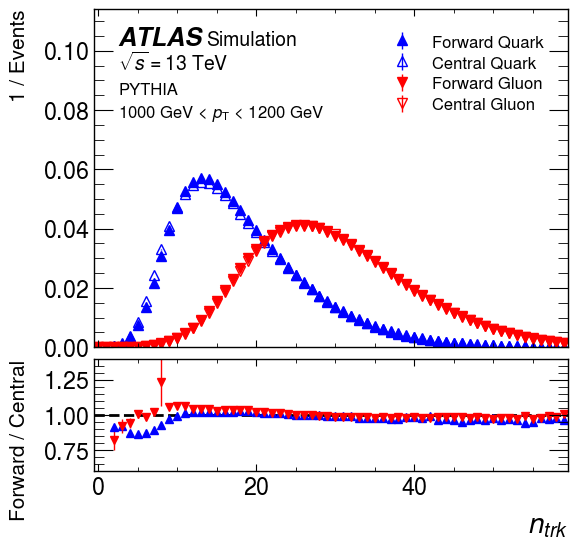

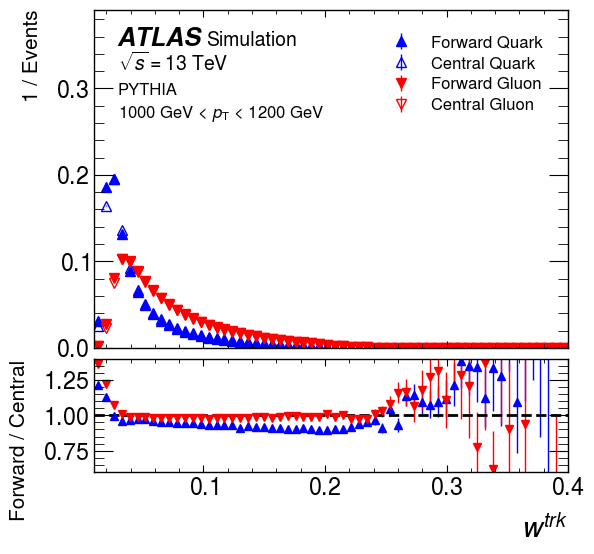

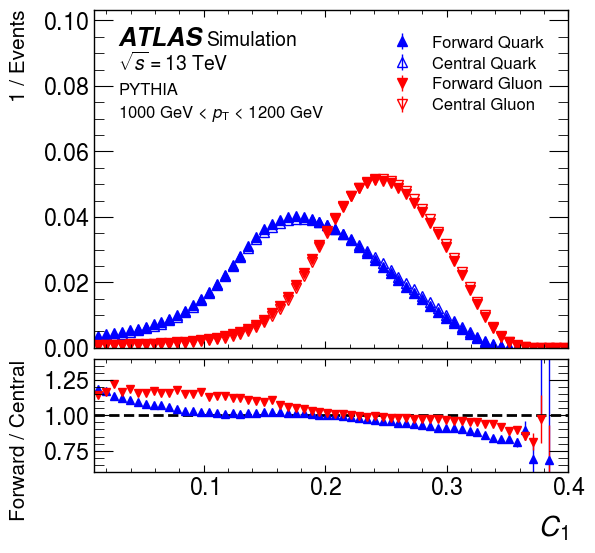

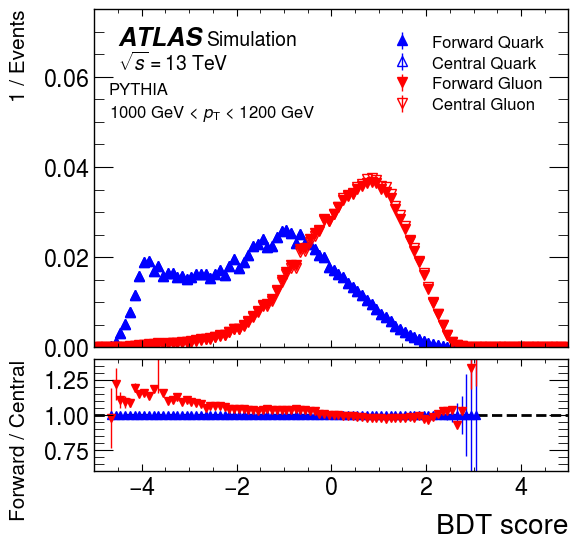

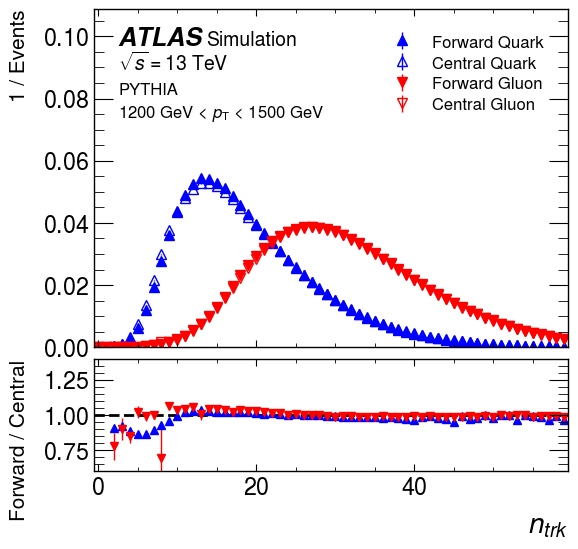

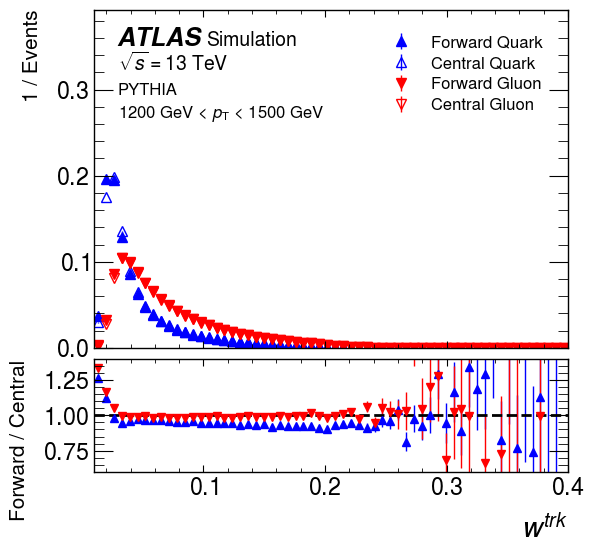

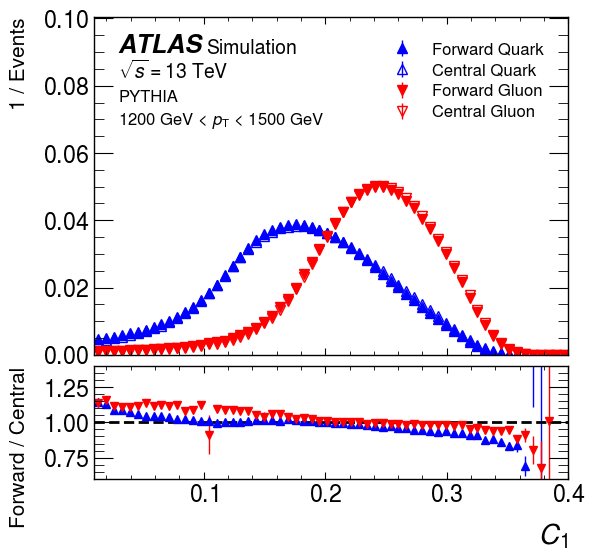

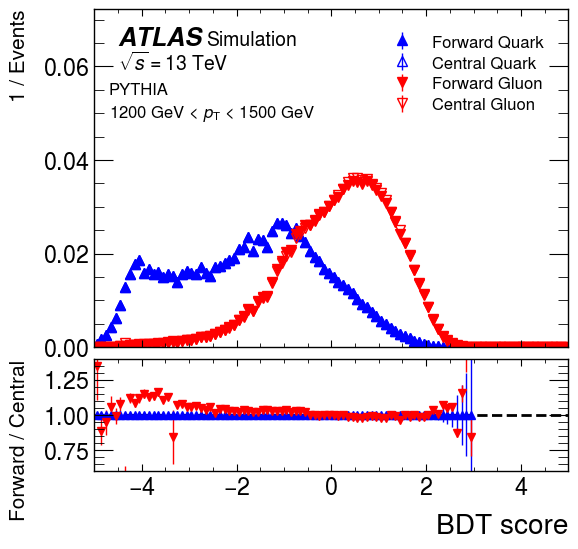

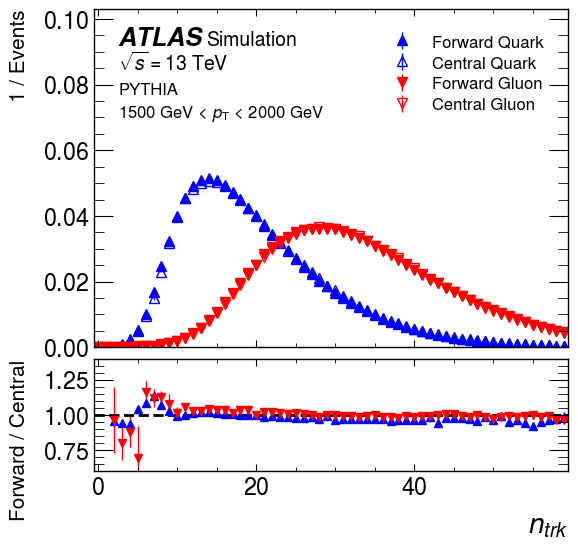

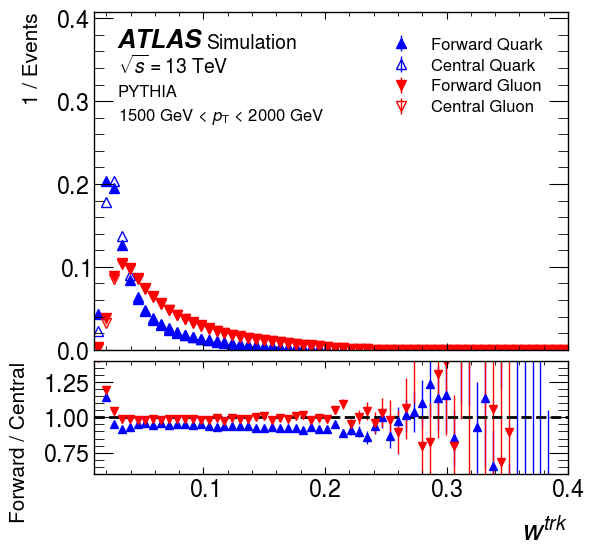

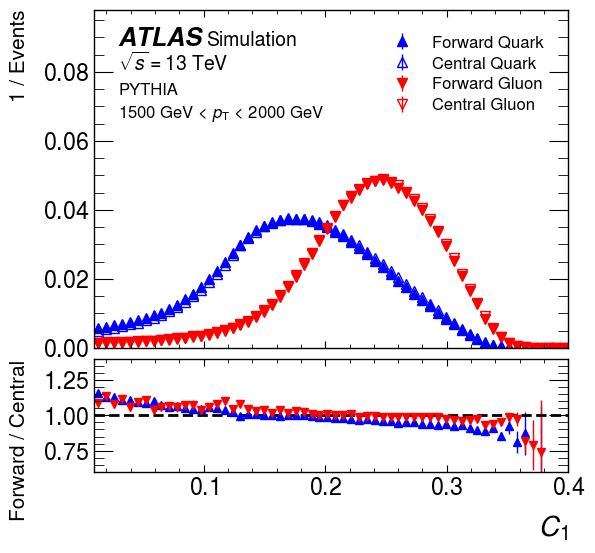

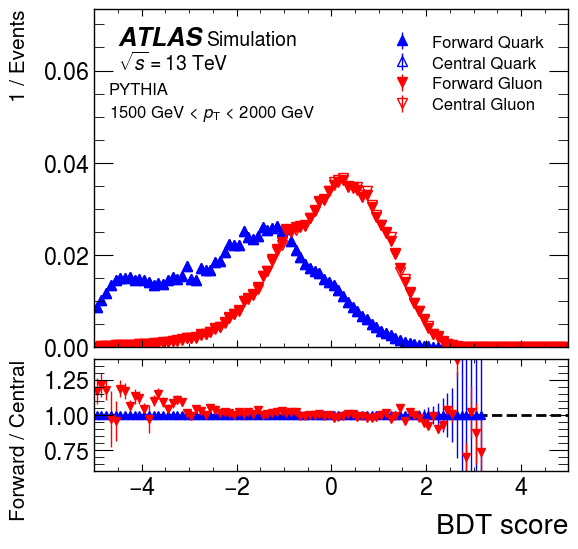

In [3]:
SFs = {}
Extraction_Results={}


for rvar in reweighting_vars:
    for i_pt, pt in enumerate(label_ptrange[:-1]):
        for var in label_var:
            bin_edges = HistBins[var]
            bin_edges1 = 0.5 * (np.array(bin_edges[:-1]) + np.array(bin_edges[1:]))
            plt.rcParams['figure.figsize'] = [6, 6]
            fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.05})
            nominal = joblib.load(nominal_path/f'{rvar}_Extraction_Results.pkl')

            Forward_MC= Normalize_unumpy(nominal[var][pt]['p_Forward_Quark'])
            Central_MC= Normalize_unumpy(nominal[var][pt]['p_Central_Quark'])
            Forward_Data= Normalize_unumpy(nominal[var][pt]['p_Forward_Gluon'] )
            Central_Data= Normalize_unumpy(nominal[var][pt]['p_Central_Gluon'])
            
            f_total = []
            c_total=[]
            # for i, syst in enumerate(syst_list):
            #     syst_path= pkl_path / syst / 'plots' / 'ADE' / 'Extraction_Results'
            #     Extraction_Results[syst]= joblib.load(syst_path / f'{rvar}_Extraction_Results.pkl' )

            #     Extraction_var_pt =  Extraction_Results[syst][var][pt]
        
            #     Forward_MC_syst= Normalize_unumpy(Extraction_var_pt['Forward_MC'])
            #     Central_MC_syst= Normalize_unumpy(Extraction_var_pt['Central_MC'])

            #     f_total.append(unumpy.nominal_values(Forward_MC_syst-Forward_MC))
            #     c_total.append(unumpy.nominal_values(Central_MC_syst-Central_MC))
                
            #print(unumpy.nominal_values(Forward_Data))

            #     #hep.histplot(unumpy.nominal_values(Forward_MC),bins=bin_edges,ax=ax0,histtype='step',linestyle='-',color = 'blue', label =f'Forward {Map_gen[syst]}')
            #     #hep.histplot(unumpy.nominal_values(Central_MC),bins=bin_edges,ax=ax0,histtype='step',linestyle=':',color = 'red', label = f'Central{Map_gen[syst]}')

            # f_total=np.array(f_total)
            # f_total_all=np.max(np.abs(f_total), axis=0)
            # c_total=np.array(c_total)
            # c_total_all=np.max(np.abs(c_total), axis=0)


            ## nominal
            #ax0.fill_between(bin_edges1,unumpy.nominal_values(Forward_MC)-0.01,unumpy.nominal_values(Forward_MC)+0.01,step='mid',color = 'cornflowerblue')
            #ax0.fill_between(bin_edges1,unumpy.nominal_values(Central_MC)-0.01,unumpy.nominal_values(Central_MC)+0.01,step='mid',color = 'lightcoral')

            hep.histplot(unumpy.nominal_values(Forward_MC),bins=bin_edges,ax=ax0,histtype='errorbar',marker='^',color = 'blue',label =f'Forward Quark',markersize=7,yerr=unumpy.std_devs(Forward_MC))#,linestyle='-',)
            hep.histplot(unumpy.nominal_values(Central_MC),bins=bin_edges,ax=ax0,histtype='errorbar',marker='^',mfc='none',color = 'b', label = f'Central Quark',markersize=7,yerr=unumpy.std_devs(Central_MC))#c_total_all )#linestyle=':',
                
            hep.histplot(unumpy.nominal_values(Forward_Data),bins=bin_edges,ax=ax0,histtype='errorbar',marker='v',yerr=unumpy.std_devs(Forward_Data),color = 'r', label = 'Forward Gluon',markersize=7)
            hep.histplot(unumpy.nominal_values(Central_Data),bins=bin_edges,ax=ax0,histtype='errorbar',yerr=unumpy.std_devs(Central_Data),marker='v',mfc='none',color = 'red', label = 'Central Gluon',markersize=7)

            ratio_Forward = safe_array_divide_unumpy(numerator = Forward_MC, denominator = Central_MC)
            ratio_Central = safe_array_divide_unumpy(numerator = Forward_Data, denominator = Central_Data)

            hep.histplot(unumpy.nominal_values(ratio_Forward),bins=bin_edges,ax=ax1,histtype='errorbar',marker="^",color = 'blue',yerr=unumpy.std_devs(ratio_Forward),markersize=6)
            hep.histplot(unumpy.nominal_values(ratio_Central),bins=bin_edges,ax=ax1,histtype='errorbar',marker="v",color = 'red',yerr=unumpy.std_devs(ratio_Central),markersize=6)

            ax0.legend(loc='upper right',fontsize=12)
            if var =='GBDT_newScore' or var =='jet_trackC1':
                y_max = np.max(unumpy.nominal_values(Central_Data))
            else:
                y_max = np.max(unumpy.nominal_values(Forward_MC))

            ytext=y_max*2
            ax0.set_ylabel("1 / Events",fontsize=15)
            #ax0.text(bin_edges[3],ytext*0.75,'anti-$k_{t}$ R=0.4 PFlow jet',fontsize=12)
            ax0.text(bin_edges[3],ytext*0.75,'PYTHIA',fontsize=12)
            ax0.text(bin_edges[3],ytext*0.68,f'{pt} GeV < '+ r'$p_{\mathrm{T}}$'+ f' < {label_ptrange[i_pt+1]} GeV',fontsize=12)

            ax0.set_xlim(bin_edges[0], bin_edges[-1])
            ax0.set_ylim(0, ytext)
            ax0.ticklabel_format(useOffset=False, style='plain')#get_yaxis().get_major_formatter().set_scientific(False)

            hep.atlas.label(ax=ax0)

            ax1.set_ylabel("Forward / Central",fontsize=15)
            ax1.set_ylim(0.6, 1.4)
            #ax1.legend(loc='lower right')
            ax1.set_xlabel(f"{Map_var_title[var]}")
            ax1.hlines(y = 1, xmin = bin_edges[0], xmax = bin_edges[-1], color = 'black', linestyle = '--', label='ratio = 1')


            fig.savefig(f"../FvsC/MC_truth_Q_G_FvsC_{pt}_{rvar}_reweight_{var}.pdf")

         

In [ ]:
SFs = {}
Extraction_Results={}
syst_list=['hadronization/sherpa','hadronization/sherpalund','matrix_element/powhegpythia','parton_shower/herwigangle','parton_shower/herwigdipole']


for rvar in reweighting_vars:
    for i_pt, pt in enumerate(label_ptrange[:-1]):
        for var in label_var:
            bin_edges = HistBins[var]
            bin_edges1 = 0.5 * (np.array(bin_edges[:-1]) + np.array(bin_edges[1:]))
            plt.rcParams['figure.figsize'] = [6, 6]

            fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.05})
            nominal = joblib.load(nominal_path/f'{rvar}_Extraction_Results.pkl')

            Forward_MC= Normalize_unumpy(nominal[var][pt]['Forward_MC'])
            Central_MC= Normalize_unumpy(nominal[var][pt]['Central_MC'])
            Forward_Data= Normalize_unumpy(nominal[var][pt]['Forward_Data'] )
            Central_Data= Normalize_unumpy(nominal[var][pt]['Central_Data'])
            
            f_total = []
            c_total=[]
            # for i, syst in enumerate(syst_list):
            #     syst_path= pkl_path / syst / 'plots' / 'ADE' / 'Extraction_Results'
            #     Extraction_Results[syst]= joblib.load(syst_path / f'{rvar}_Extraction_Results.pkl' )

            #     Extraction_var_pt =  Extraction_Results[syst][var][pt]
        
            #     Forward_MC_syst= Normalize_unumpy(Extraction_var_pt['Forward_MC'])
            #     Central_MC_syst= Normalize_unumpy(Extraction_var_pt['Central_MC'])

            #     f_total.append(unumpy.nominal_values(Forward_MC_syst-Forward_MC))
            #     c_total.append(unumpy.nominal_values(Central_MC_syst-Central_MC))
                
            #print(unumpy.nominal_values(Forward_Data))

            #     #hep.histplot(unumpy.nominal_values(Forward_MC),bins=bin_edges,ax=ax0,histtype='step',linestyle='-',color = 'blue', label =f'Forward {Map_gen[syst]}')
            #     #hep.histplot(unumpy.nominal_values(Central_MC),bins=bin_edges,ax=ax0,histtype='step',linestyle=':',color = 'red', label = f'Central{Map_gen[syst]}')

            # f_total=np.array(f_total)
            # f_total_all=np.max(np.abs(f_total), axis=0)
            # c_total=np.array(c_total)
            # c_total_all=np.max(np.abs(c_total), axis=0)


            ## nominal
            #ax0.fill_between(bin_edges1,unumpy.nominal_values(Forward_MC)-0.01,unumpy.nominal_values(Forward_MC)+0.01,step='mid',color = 'cornflowerblue')
            #ax0.fill_between(bin_edges1,unumpy.nominal_values(Central_MC)-0.01,unumpy.nominal_values(Central_MC)+0.01,step='mid',color = 'lightcoral')

            hep.histplot(unumpy.nominal_values(Forward_MC),bins=bin_edges,ax=ax0,histtype='step',linestyle='-',lw=2,color = 'blue',label =f'Forward PYTHIA')#f_total_all)#unumpy.std_devs(Forward_MC))#,linestyle='-',)
            hep.histplot(unumpy.nominal_values(Central_MC),bins=bin_edges,ax=ax0,histtype='step',linestyle=':',lw=2,color = 'red', label = f'Central PYTHIA')#c_total_all )#unumpy.std_devs(Central_MC))#c_total_all )#linestyle=':',
                
            hep.histplot(unumpy.nominal_values(Forward_Data),bins=bin_edges,ax=ax0,histtype='errorbar',marker='s',yerr=unumpy.std_devs(Forward_Data),color = 'blue', label = 'Forward Data',markersize=6)
            hep.histplot(unumpy.nominal_values(Central_Data),bins=bin_edges,ax=ax0,histtype='errorbar',yerr=unumpy.std_devs(Central_Data),marker='^',color = 'red', label = 'Central Data',markersize=6)

            ratio_Forward = safe_array_divide_unumpy(numerator = Forward_Data, denominator = Forward_MC)
            ratio_Central = safe_array_divide_unumpy(numerator = Central_Data, denominator = Central_MC)

            hep.histplot(unumpy.nominal_values(ratio_Forward),bins=bin_edges,ax=ax1,histtype='errorbar',marker="s",color = 'blue',yerr=unumpy.std_devs(ratio_Forward),markersize=6)
            hep.histplot(unumpy.nominal_values(ratio_Central),bins=bin_edges,ax=ax1,histtype='errorbar',marker="^",color = 'red',yerr=unumpy.std_devs(ratio_Central),markersize=6)

            ax0.legend(loc='upper right',fontsize=13)
            y_max = np.max(unumpy.nominal_values(Forward_Data))
            ytext=y_max*1.3
            ax0.set_ylabel("1 / Events")
            ax0.text(bin_edges[3],ytext,f'{pt} GeV < '+ r'$p_{\mathrm{T}}$'+ f' < {label_ptrange[i_pt+1]} GeV',fontsize=13)
            ax0.set_xlim(bin_edges[0], bin_edges[-1])
            ax0.set_ylim(0, y_max * 1.8)
            ax0.ticklabel_format(useOffset=False, style='plain')#get_yaxis().get_major_formatter().set_scientific(False)

            hep.atlas.label(data=True,ax=ax0,lumi=140)

            ax1.set_ylabel("Data / MC",fontsize=15)
            ax1.set_ylim(0.6, 1.4)
            #ax1.legend(loc='lower right')
            ax1.set_xlabel(f"{Map_var_title[var]}")
            ax1.hlines(y = 1, xmin = bin_edges[0], xmax = bin_edges[-1], color = 'black', linestyle = '--', label='ratio = 1')


            fig.savefig(f"../FvsC_syst/MCvsData_FvsC_{pt}_{rvar}_reweight_{var}.pdf")

         

In [3]:
SFs = {}
Extraction_Results={}
colorlist=['b','r','g']
markerlist=['s','^','v']
for rvar in reweighting_vars:
    for var in label_var:
        bin_edges = HistBins[var]
        my_list = [0] * (len(bin_edges)-1)
        bin_edges1 = 0.5 * (np.array(bin_edges[:-1]) + np.array(bin_edges[1:]))
        plt.rcParams['figure.figsize'] = [8, 6]
        fig, ax0 = plt.subplots()
        nominal = joblib.load(nominal_path/f'{rvar}_Extraction_Results.pkl')
        
        #hep.histplot(my_list,bins=bin_edges,ax=ax0,histtype='step',linestyle='-',color='black',lw=2,label =f'Quark')#f_total_all)#unumpy.std_devs(Forward_MC))#,linestyle='-',)
        #hep.histplot(my_list,bins=bin_edges,ax=ax0,histtype='step',linestyle=':',color='black',lw=2,label =f'Gluon')#f_total_all)#unumpy.std_devs(Forward_MC))#,linestyle='-',)
        #hep.histplot(my_list,bins=bin_edges,ax=ax0,histtype='step',linestyle='-',color='black',lw=2,label =f'Quark')#f_total_all)#unumpy.std_devs(Forward_MC))#,linestyle='-',)

        for i_pt, pt in enumerate(label_ptrange[:-1]):#label_ptrange):

            

            Forward_MC= Normalize_unumpy(nominal[var][pt]['p_Quark'])
            Central_MC= Normalize_unumpy(nominal[var][pt]['p_Gluon'])

            if pt in [500,800,1000]: 
                k=[500,800,1000].index(pt)
                hep.histplot(unumpy.nominal_values(Forward_MC),yerr=unumpy.std_devs(Forward_MC),bins=bin_edges,ax=ax0,histtype='errorbar',color=colorlist[k],marker=markerlist[k],label =f'{pt} GeV < '+ r'$p_{\mathrm{T}}$'+ f' < {label_ptrange[i_pt+1]} GeV')#f_total_all)#unumpy.std_devs(Forward_MC))#,linestyle='-',)
                hep.histplot(unumpy.nominal_values(Central_MC),yerr=unumpy.std_devs(Central_MC),bins=bin_edges,ax=ax0,histtype='errorbar',color=colorlist[k],marker=markerlist[k],mfc='none')#c_total_all )#unumpy.std_devs(Central_MC))#c_total_all )#linestyle=':',
                


        ax0.legend(loc='upper right')
        if var =='GBDT_newScore' or var =='jet_trackC1':
            y_max = np.max(unumpy.nominal_values(Central_MC))
            ytext = y_max*1.9 
            ax0.text(bin_edges[3],ytext*0.7,'Closed symbols : Quark-jets',fontsize=15)
            ax0.text(bin_edges[3],ytext*0.65,'Open symbols : Gluon-jets',fontsize=15)
        else:
            y_max = np.max(unumpy.nominal_values(Forward_MC))
            ytext = y_max*1.9 
            ax0.text(bin_edges[30],ytext*0.7,'Closed symbols : Quark-jets',fontsize=15)
            ax0.text(bin_edges[30],ytext*0.65,'Open symbols : Gluon-jets',fontsize=15)

        ax0.set_ylabel("1 / Events")
        #ax0.text(bin_edges[3],ytext*0.85,'anti-$k_{t}$ R=0.4 PFlow jet',fontsize=15)
        ax0.text(bin_edges[3],ytext*0.85,'PYTHIA',fontsize=15)
        ax0.set_xlim(bin_edges[0], bin_edges[-1])
        ax0.set_ylim(0, y_max * 2)
        hep.atlas.label(ax=ax0)
        ax0.set_xlabel(f"{Map_var_title[var]}")



        fig.savefig(f"../FvsC_syst/MCvsData_QvsG_{pt}_{rvar}_reweight_{var}.pdf")

         